In [1]:
import pandas as pd
import numpy as np
import torch

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch.utils.data as data_utils

import matplotlib.pyplot as plt

In [2]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/boston.csv')

In [3]:
df_raw

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
x = df_raw.drop(['medv'], axis=1) #집값 medv를 뺀다
y = df_raw['medv']

print(x.shape)
print(y.shape)
x

(506, 13)
(506,)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [5]:
#Train, Test 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1234)

#Train Data
print("x_train의 크기: ", x_train.shape)
print("y_train의 크기: ", y_train.shape)

#Test Data
print("x_test의 크기: ", x_test.shape)
print("y_test의 크기: ", y_test.shape)
print(type(y_train))

x_train의 크기:  (354, 13)
y_train의 크기:  (354,)
x_test의 크기:  (152, 13)
y_test의 크기:  (152,)
<class 'pandas.core.series.Series'>


In [6]:
#데이터 스케일링 (x - min(x)) / (max(x) - min(x))
scaler = MinMaxScaler() # sklearn 라이브러리에서 스케일링 해주는 함수
scaler.fit(x_train)
x_train_scale = scaler.transform(x_train) # x_train_scale은 numpy ndarray
x_test_scale = scaler.transform(x_test) # x_test_scale은 numpy ndarray

#ndarray -> Tensor
x_train_tensor = torch.FloatTensor(x_train_scale)
y_train_tensor = torch.FloatTensor(y_train.values) #pd.Series --> numpy ndarray로 변환

x_test_tensor = torch.FloatTensor(x_test_scale)
y_test_tensor = torch.FloatTensor(y_test.values)

In [7]:
pd.DataFrame(x_train_scale)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000669,0.000000,0.089076,0.0,0.123457,0.738647,0.613800,0.250167,0.043478,0.168260,0.574468,1.000000,0.123068
1,0.002469,0.000000,0.296921,0.0,0.277778,0.544932,0.849640,0.167627,0.173913,0.374761,0.882979,0.173133,0.245585
2,0.121676,0.000000,0.646628,0.0,0.604938,0.617168,0.905252,0.072958,1.000000,0.913958,0.808511,0.048304,0.663907
3,0.008730,0.210526,0.128666,0.0,0.539095,0.661621,0.841401,0.106101,0.173913,0.145315,0.042553,0.967468,0.360375
4,0.001183,0.000000,0.296921,0.0,0.277778,0.616976,0.704428,0.182581,0.173913,0.374761,0.882979,0.996653,0.163907
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.000124,1.000000,0.081378,0.0,0.063992,0.857061,0.298661,0.421781,0.130435,0.068834,0.223404,0.983899,0.031733
350,0.000458,0.221053,0.189883,0.0,0.111111,0.466948,0.190525,0.601210,0.130435,0.105163,0.446809,1.000000,0.184879
351,0.000820,0.000000,0.493402,0.0,0.106996,0.469055,0.405767,0.462463,0.130435,0.193117,0.361702,1.000000,0.239238
352,0.004122,0.000000,0.371334,1.0,0.213992,0.353133,0.882595,0.268123,0.130435,0.170172,0.638298,0.995791,0.613962


In [8]:
#Batch
train_data = data_utils.TensorDataset(x_train_tensor, y_train_tensor)

dataloader = data_utils.DataLoader(train_data, batch_size=100, shuffle=True, drop_last = True)

#shuffle : 랜덤으로 섞을 것인지
#drop_last : 352 개 데이터가 있는데 100개씩 한다면 52개가 남음, 남은 것은 버리고 300개만 처리

#배치화된 데이터 확인
for index, datas in enumerate(dataloader):
    print(index)
    print(datas[0].shape)
    print(datas[1].shape)
    break

0
torch.Size([100, 13])
torch.Size([100])


In [9]:
#Hyper parameter
input_size = 13
output_size = 1
learning_rate = 0.1
n_epochs = 100 #학습한 횟수

In [10]:
#Model
model = torch.nn.Linear(input_size, output_size)

In [11]:
#Cost Function
# 평균제곱오차 사용
criterion = torch.nn.MSELoss() # '기준', 모델이 잘 학습됐는지 알 수 있는 척도
#Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#SGD 사용하는데 위에서 선언한 모델의 파라미터들로 w 값을 말함
#lr은 learning_rate

In [14]:
#Running the model
train_loss=[]
test_loss=[]

#데이터셋 100개 epoch에 대한 for문 있어야하고
#Batch 학습에 대한 for문 하나 더 필요
for epoch in range(n_epochs): #epoch 수만큼 반복
    for idx, (x_batch, y_batch) in enumerate(dataloader): #미니배치 for문
        #Batch 학습
        optimizer.zero_grad() #미분값 계산한걸 비워줌
        
        y_pred = model(x_batch) #100,13 이 모델로 들어감
        y_pred = y_pred.reshape(-1)
        #데이터 셋이 100개 이므로 y값도 100개 나옴
        loss_train = criterion(y_pred, y_batch) #y_batch는 실제값
        
        loss_train.backward() #backward() 미분값을 계산
        optimizer.step() # weight 값이 업데이트 됨
        
        #Validation
        y_test_pred = model(x_test_tensor)
        y_test_pred = y_test_pred.reshape(-1)
        loss_test = criterion(y_test_pred, y_test_tensor)
        
    train_loss.append(loss_train.item())
    test_loss.append(loss_test.item())
    print(f'epoch: {epoch+1}, Train loss: {train_loss[-1]:.2f}, Test loss: {test_loss[-1]:.2f}')
    #train-loss[-1] 이라 하면 마지막 인덱스의 값을 가져오는 것이다.

epoch: 1, Train loss: 41.35, Test loss: 24.15
epoch: 2, Train loss: 27.54, Test loss: 23.84
epoch: 3, Train loss: 18.08, Test loss: 23.83
epoch: 4, Train loss: 24.10, Test loss: 23.67
epoch: 5, Train loss: 37.08, Test loss: 24.51
epoch: 6, Train loss: 25.80, Test loss: 23.62
epoch: 7, Train loss: 28.50, Test loss: 23.86
epoch: 8, Train loss: 25.58, Test loss: 23.49
epoch: 9, Train loss: 26.10, Test loss: 23.65
epoch: 10, Train loss: 18.85, Test loss: 23.41
epoch: 11, Train loss: 24.80, Test loss: 23.84
epoch: 12, Train loss: 22.45, Test loss: 23.36
epoch: 13, Train loss: 22.63, Test loss: 23.30
epoch: 14, Train loss: 21.13, Test loss: 23.37
epoch: 15, Train loss: 24.34, Test loss: 23.20
epoch: 16, Train loss: 29.58, Test loss: 23.20
epoch: 17, Train loss: 10.37, Test loss: 23.22
epoch: 18, Train loss: 26.47, Test loss: 23.17
epoch: 19, Train loss: 27.79, Test loss: 23.06
epoch: 20, Train loss: 27.37, Test loss: 23.23
epoch: 21, Train loss: 21.86, Test loss: 22.99
epoch: 22, Train loss:

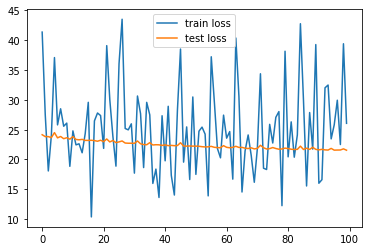

In [15]:
#plotting loss value
plt.figure()
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.legend()
plt.show()

In [16]:
#집값 확인
x.iloc[0]

crim         0.00632
zn          18.00000
indus        2.31000
chas         0.00000
nox          0.53800
rm           6.57500
age         65.20000
dis          4.09000
rad          1.00000
tax        296.00000
ptratio     15.30000
b          396.90000
lstat        4.98000
Name: 0, dtype: float64

In [17]:
x_pred=x.iloc[0]

In [18]:
x_pred = x_pred.to_numpy()
#모델을 학습을 한게 스케일된 데이터로 만들어주어야 하기 때문에 numpy로 바꿔준다.

In [21]:
x_pred = x_pred.reshape(1,-1)
#(1,13)으로 바꿔줘야 스케일링 해줄 수 있다. 그래서 reshape 함수 사용
x_pred.shape

(1, 13)

In [22]:
x_pred = scaler.transform(x_pred)

In [23]:
x_pred

array([[-3.07978878e-05,  1.89473684e-01,  6.78152493e-02,
         0.00000000e+00,  3.14814815e-01,  5.77505269e-01,
         6.41606591e-01,  3.13067755e-01,  0.00000000e+00,
         2.06500956e-01,  2.87234043e-01,  1.00000000e+00,
         8.96799117e-02]])

In [25]:
#모델에 넣을려면 pytorch에서 tensor 형태로 넣어야하므로 바꾼다.
x_pred = torch.FloatTensor(x_pred)
x_pred.shape

torch.Size([1, 13])

In [26]:
pred_medv = model(x_pred)
pred_medv

tensor([[30.3585]], grad_fn=<AddmmBackward0>)

In [ ]:
#데이터의 0 번째 행에서 집 예측값은 30 %가 나온다. 실제로는 24%